In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.methods.CAA_class import _CAA
from src.methods.OAA_class import _OAA
from src.methods.RBOAA_class import _RBOAA

from src.utils.synthetic_data_class import _synthetic_data
from src.utils.synthetic_data_naive import synthetic_data_naive

from src.utils.eval_measures import NMI, MCC

In [2]:
my_pallette = {'AA': "#EF476F", 'OAA': "#FFD166", 'RBOAA': "#06D6A0","TSOAA" : "#073B4C"}

In [3]:
synthetic_data_naive_large = _synthetic_data(1000,20, 3, 5, -1.1, False, 1, 100)
synthetic_data_naive_small = _synthetic_data(50,20, 3, 5,-1.1, False, 1, 100)


np.save('SyntheticData/1000_respondents/Data_naive_large.npy',synthetic_data_naive_large)
np.save('SyntheticData/50_respondents/Data_naive_small.npy',synthetic_data_naive_small)

np.save('SyntheticData/1000_respondents/Data_naive_largeX.npy',synthetic_data_naive_large.X)
np.save('SyntheticData/50_respondents/Data_naive_smallX.npy',synthetic_data_naive_small.X)



In [4]:
idx, counts = np.unique(synthetic_data_naive_large.X, return_counts=True)

In [5]:
counts

array([4069, 3947, 4261, 3640, 4083], dtype=int64)

In [6]:
def calcMI(z1,z2):
    eps = 10e-16
    P = z1@z2.T
    PXY = P/P.sum()
    PXPY = np.outer(np.expand_dims(PXY.sum(1), axis=0),np.expand_dims(PXY.sum(0), axis=1))
    ind = np.nonzero(PXY>0)
    MI = np.sum(PXY*np.log(eps+PXY/(eps+PXPY)))
    return MI
    
def calcNMI(z1,z2):
    NMI=(2*calcMI(z1,z2))/(calcMI(z1,z1)+calcMI(z2,z2))
    #NMI = NMI.reshape((z1.shape[0], z1.shape[0]))
    
    return NMI

### Loading in previously generated synthetic data

In [9]:
X_1000_complex_large = np.load('SyntheticData/1000_respondents/X_large.npy') # questionnaire data
X_1000_naive_large = np.load('SyntheticData/synthetic_data_naive_large.pkl', allow_pickle=True) # naive data

X_50_complex_small = np.load('SyntheticData/50_respondents/X.npy') # questionnaire data
X_50_naive_small = np.load('SyntheticData/synthetic_data_naive_small.pkl', allow_pickle=True) # naive data

### Perform analysis with RBOAA

In [42]:
K_list = [2,3,4,5,6,7,8,9,10]

In [9]:
rboaa_results = np.zeros((10,10),dtype=object)
RBOAA = _RBOAA() # instantiate
for i in range(len(K_list)):
    for j in range(10):
        rboaa_results[i,j] = RBOAA._compute_archetypes(X=X_1000_complex_large,
                          K=K_list[i], # how many archetypes to use for analysis
                          p=5, # length of likert scale in X
                          n_iter= 15000, # number of gradient steps
                          lr=0.01,
                          mute=True, # verbosity
                          early_stopping=True, # whether to terminate if loss does not improve
                          with_OAA_initialization=False, # whether to hotstart hyperparameters from OAA analysis
                          beta_regulators=False, # whether to use c1 and c2 as additional hyperparameters to model ordinal scale arbitrarily
                          alternating=False, # whether to first train with a low (and capped) sigma
                          columns=[f'q{i}' for i in range(X_1000_complex_large.shape[0])]
                          )

In [11]:
oaa_results = np.zeros((10,10),dtype=object)
OAA = _OAA() # instantiate

for i in range(len(K_list)):
    for j in range(10):
        oaa_results[i-1,j] = OAA._compute_archetypes(X=X_1000_complex_large,
                          K=K_list[i], # how many archetypes to use for analysis
                          p=5, # length of likert scale in X
                          n_iter= 15000, # number of gradient steps
                          lr=0.01,
                          mute=True, # verbosity
                          early_stopping=True, # whether to terminate if loss does not improve
                          beta_regulators=False, # whether to use c1 and c2 as additional hyperparameters to model ordinal scale arbitrarily
                          alternating=False, # whether to first train with a low (and capped) sigma
                          columns=[f'q{i}' for i in range(X_1000_complex_large.shape[0])]
                          )

In [138]:
rboaa_results_naive_large = np.zeros((10,10),dtype=object)
RBOAA = _RBOAA() # instantiate
for i in range(len(K_list)):
    for j in range(10):
        rboaa_results_naive_large[i-1,j] = RBOAA._compute_archetypes(X=X_1000_naive_large,
                          K=K_list[i], # how many archetypes to use for analysis
                          p=5, # length of likert scale in X
                          n_iter= 15000, # number of gradient steps
                          lr=0.01,
                          mute=True, # verbosity
                          early_stopping=True, # whether to terminate if loss does not improve
                          with_OAA_initialization=False, # whether to hotstart hyperparameters from OAA analysis
                          beta_regulators=False, # whether to use c1 and c2 as additional hyperparameters to model ordinal scale arbitrarily
                          alternating=False, # whether to first train with a low (and capped) sigma
                          columns=[f'q{i}' for i in range(X_1000_complex_large.shape[0])]
                          )

In [10]:
caa_results = np.zeros((10,10),dtype=object)
AA = _CAA() # instantiate

for i in range(len(K_list)):
    for j in range(10):
        caa_results[i-1,j] = AA._compute_archetypes(X=X_1000_complex_large,
                          K=K_list[i], # how many archetypes to use for analysis
                          p=5, # length of likert scale in X
                          n_iter= 15000, # number of gradient steps
                          lr=0.01,
                          mute=True, # verbosity
                          early_stopping=True, # whether to terminate if loss does not improve
                          columns=[f'q{i}' for i in range(X_1000_complex_large.shape[0])]
                          )

In [12]:
RBOAA_complex_large = np.load('SyntheticData/1000_respondents/rboaa_results_large_complex_Emilie.npy',allow_pickle=True)
OAA_complex_large = np.load('SyntheticData/1000_respondents/oaa_results_large_complex_Emilie.npy',allow_pickle=True)
OSM_complex_large = pd.read_csv('SyntheticData/data_complex_OSM_large.csv',index_col=0)
AA_complex_large = np.load('SyntheticData/1000_respondents/aa_results_large_complex_Emilie.npy',allow_pickle=True)

In [ ]:
tsoaa_results = np.zeros((10,10),dtype=object)
AA = _CAA() # instantiate

for i in range(len(K_list)):
    for j in range(10):
        tsoaa_results[i-1,j] = AA._compute_archetypes(X=OSM_complex_large.values.T,
                          K=K_list[i], # how many archetypes to use for analysis
                          p=5, # length of likert scale in X
                          n_iter= 15000, # number of gradient steps
                          lr=0.01,
                          mute=True, # verbosity
                          early_stopping=True, # whether to terminate if loss does not improve
                          columns=[f'q{i}' for i in range(OSM_complex_large.shape[0])]
                          )

In [41]:
list(range(2,11))

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [153]:
np.save('SyntheticData/1000_respondents/tsoaa_results_large_complex_Emilie.npy',tsoaa_results)
#np.save('SyntheticData/1000_respondents/caa_results_large_complex_Emilie.npy',caa_results)

In [14]:
tsoaa_results_complex_large = np.load('SyntheticData/1000_respondents/tsoaa_results_large_complex_Emilie.npy',allow_pickle=True)

In [17]:
RBOAA_complex_large = RBOAA_complex_large[1:,:]
OAA_complex_large = OAA_complex_large[1:,:]
#tsoaa_results_complex_large = tsoaa_results_complex_large[1:,:]

AA_complex_large = AA_complex_large[1:,:]

Closing remarks:
* The other methods e.g. OAA and RBOAA also have a _compute_archetypes method which creates a result object.
* The parameters to OAA._compute archetypes are identical to that of RBOAA
* We set up a wrapper class (inside AAM.py). I will make the new changes compatible with that interface before publication - it is not critical for generating results but only helps the user experience.

In [25]:
Loss_rboaa_complex_large = np.zeros((8,10))
Loss_oaa_complex_large = np.zeros((8,10))
Loss_tsoaa_complex_large = np.zeros((8,10))
Loss_caa_complex_large = np.zeros((8,10))

Loss_rboaa_naive_large = np.zeros((8,10))

for i in range(8):
    for j in range(10):
        Loss_rboaa_complex_large[i,j] = RBOAA_complex_large[i,j].loss[-1]
        Loss_oaa_complex_large[i,j] = OAA_complex_large[i,j].loss[-1]
        Loss_caa_complex_large[i,j] = AA_complex_large[i,j].loss[-1]
        #Loss_tsoaa_complex_large[i,j] = tsoaa_results_complex_large[i,j].loss[-1]

        #Loss_rboaa_naive_large[i,j] = rboaa_results_naive_large[i,j].loss[-1]


IndexError: index 6 is out of bounds for axis 0 with size 6

In [39]:
RBOAA_complex_large[4,7].K

7

In [31]:
RBOAA_complex_large

array([[<src.utils.AA_result_class._OAA_result object at 0x000001CD5C0A9360>,
      dtype=object)

In [227]:
my_pallette["OAA"]

'#FFD166'

In [220]:
Loss_rboaa_complex_large[1:,:]

array([[1.91048813, 1.91048813, 1.91048813, 1.91048813, 1.91048813,
        1.91048813, 1.91048813, 1.91048813, 1.91048813, 1.91048813],
       [1.91048813, 1.91048813, 1.91048813, 1.91048813, 1.91048813,
        1.75502861, 1.75502861, 1.75502861, 1.75502861, 1.75502861],
       [1.75502861, 1.75502861, 1.75502861, 1.75502861, 1.75502861,
        1.75502861, 1.75502861, 1.75502861, 1.75502861, 1.75502861],
       [1.74771619, 1.74771619, 1.74771619, 1.74771619, 1.74771619,
        1.74771619, 1.74771619, 1.70421886, 1.70421886, 1.70421886],
       [1.70421886, 1.70421886, 1.70421886, 1.70421886, 1.70421886,
        1.70421886, 1.70421886, 1.70421886, 1.70421886, 1.70421886],
       [1.70421886, 1.70421886, 1.70421886, 1.70421886, 1.70421886,
        1.70421886, 1.70421886, 1.70421886, 1.70421886, 1.64244413],
       [1.64244413, 1.64244413, 1.64244413, 1.64244413, 1.64244413,
        1.64244413, 1.64244413, 1.64244413, 1.64244413, 1.64244413]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


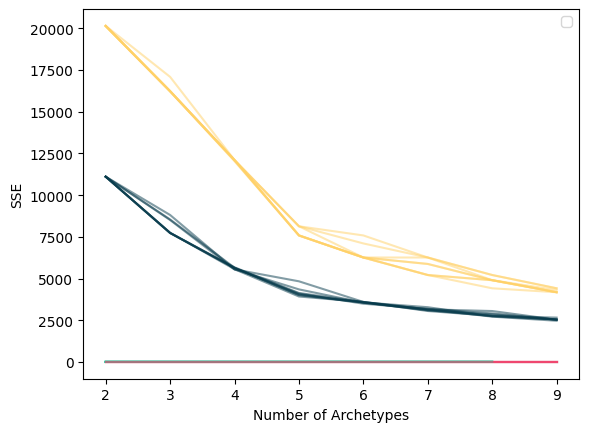

In [228]:
fig, ax = plt.subplots()


for i in range(Loss_rboaa_complex_large.shape[0]):
    ax.plot(range(len(Loss_rboaa_complex_large[1:,:])), Loss_rboaa_complex_large[1:,i], '-',color=my_pallette["RBOAA"],alpha=0.5)
    ax.plot(range(len(Loss_oaa_complex_large)), Loss_oaa_complex_large[:,i], '-',color=my_pallette["OAA"], alpha=0.5)
    ax.plot(range(len(Loss_tsoaa_complex_large)), Loss_tsoaa_complex_large[:,i], '-',color=my_pallette["TSOAA"], alpha=0.5)
    ax.plot(range(len(Loss_caa_complex_large)), Loss_caa_complex_large[:,i], '-',color=my_pallette["AA"], alpha=0.5)


#ax.plot(range(len(Loss_rboaa_complex_large)), np.min(Loss_rboaa_complex_large,axis=1), '-',color="#ff7f0e", label='RBOAA',linewidth=3)
##ax.plot(range(len(Loss_oaa_complex_large)), np.min(Loss_oaa_complex_large,axis=1), '-',color="#2ca02c", label='OAA',linewidth=3)
#ax.plot(range(len(Loss_tsoaa_complex_large)), np.min(Loss_tsoaa_complex_large,axis=1), '-',color="#d62728", label='TSOAA',linewidth=3)
#ax.plot(range(len(Loss_caa_complex_large)), np.min(Loss_caa_complex_large,axis=1), '-',color="#1f77b4", label='CAA',linewidth=3)

ax.set_xticks(list(range(8)))
ax.set_xticklabels(list(range(2,10)))

ax.set(xlabel='Number of Archetypes', ylabel='SSE')
ax.legend()

plt.show()

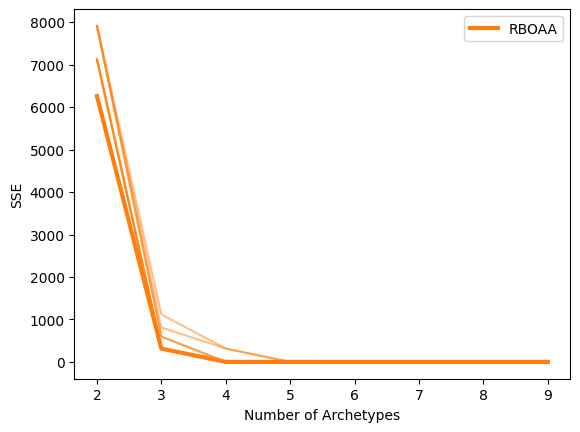

In [146]:
fig, ax = plt.subplots()


for i in range(Loss_rboaa_complex_large.shape[0]):
    ax.plot(range(len(Loss_rboaa_naive_large)), Loss_rboaa_naive_large[:,i], '-',color="#ff7f0e",alpha=0.5)
    #ax.plot(range(len(Loss_oaa_complex_large)), Loss_oaa_complex_large[:,i], '-',color="#2ca02c", alpha=0.5)
    #ax.plot(range(len(Loss_tsoaa_complex_large)), Loss_tsoaa_complex_large[:,i], '-',color="#d62728", alpha=0.5)
    #ax.plot(range(len(Loss_caa_complex_large)), Loss_caa_complex_large[:,i], '-',color="#1f77b4", alpha=0.5)


ax.plot(range(len(Loss_rboaa_complex_large)), np.min(Loss_rboaa_naive_large,axis=1), '-',color="#ff7f0e", label='RBOAA',linewidth=3)
#ax.plot(range(len(Loss_oaa_complex_large)), np.min(Loss_oaa_complex_large,axis=1), '-',color="#2ca02c", label='OAA',linewidth=3)
#ax.plot(range(len(Loss_tsoaa_complex_large)), np.min(Loss_tsoaa_complex_large,axis=1), '-',color="#d62728", label='TSOAA',linewidth=3)
#ax.plot(range(len(Loss_caa_complex_large)), np.min(Loss_caa_complex_large,axis=1), '-',color="#1f77b4", label='CAA',linewidth=3)

ax.set_xticks(list(range(8)))
ax.set_xticklabels(list(range(2,10)))

ax.set(xlabel='Number of Archetypes', ylabel='SSE')
ax.legend()

plt.show()

In [108]:
import itertools
K_list = list(range(2,10))

test = itertools.combinations(range(10), 2)
t = list(test)
calcIDX = np.array(t)
## Create big NMI loop
NMITSOAA = np.zeros((len(K_list),len(calcIDX)))
NMI_RBOAA_complex_large = np.zeros((len(K_list),len(calcIDX)))
NMI_OAA_complex_large = np.zeros((len(K_list),len(calcIDX)))
NMI_TSOAA_complex_large = np.zeros((len(K_list),len(calcIDX)))

for i in range(len(K_list)):
    for j in range(len(calcIDX)):
        #NMITSOAA[i,j] = calcNMI(S_save[i][calcIDX[j][0]], S_save[i][calcIDX[j][1]])
        NMI_RBOAA_complex_large[i,j] = calcNMI(rboaa_results[i,calcIDX[j][0]].A, rboaa_results[i,calcIDX[j][1]].A)
        NMI_OAA_complex_large[i,j] = calcNMI(oaa_results[i,calcIDX[j][0]].A, oaa_results[i,calcIDX[j][1]].A)
        NMI_TSOAA_complex_large[i,j] = calcNMI(tsoaa_results[i,calcIDX[j][0]].A, tsoaa_results[i,calcIDX[j][1]].A)



In [110]:
import pandas as pd
import seaborn as sns
df1 = pd.DataFrame(NMI_TSOAA_complex_large.T, columns = K_list)
df2 = pd.DataFrame(NMI_OAA_complex_large.T, columns = K_list)
df3 = pd.DataFrame(NMI_RBOAA_complex_large.T, columns = K_list)


df1['Method'] = 'TSOAA'
df2['Method'] = 'OAA'
df3['Method'] = 'RBOAA'


df1 = df1.melt(id_vars='Method', var_name='Archetypes', value_name='NMI')
df2 = df2.melt(id_vars='Method', var_name='Archetypes', value_name='NMI')
df3 = df3.melt(id_vars='Method', var_name='Archetypes', value_name='NMI')

df = pd.concat([df1,df2,df3])

#df = df1 

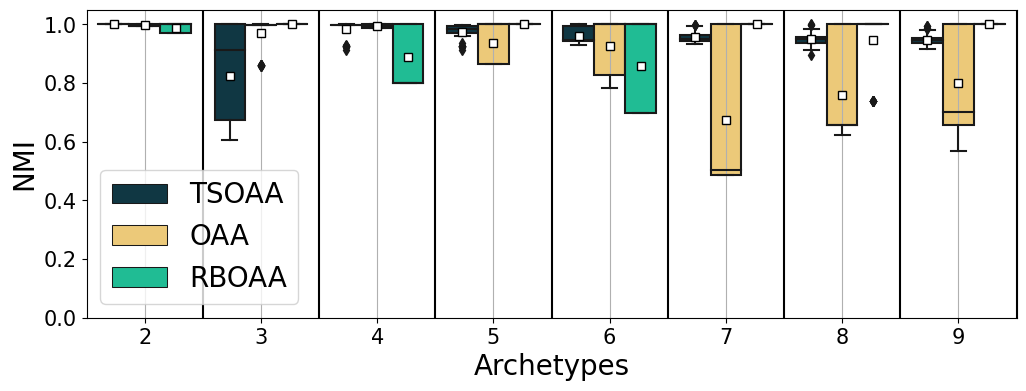

In [226]:
fig, ax = plt.subplots(1,1,figsize = (12,4))

ax = sns.boxplot(x='Archetypes', y="NMI", hue="Method", showmeans=True, data=df,palette=my_pallette,meanprops={"marker": "s", "markerfacecolor": "white", "markeredgecolor": "black"})

#ax.axvline(linewidth=2, color='r')
ax.xaxis.grid(True, which='major')
[ax.axvline(x+.5,color='k') for x in ax.get_xticks()]
ax.set_ylabel("NMI", size=20)
ax.set_ylim([0,1.05])
ax.set_xlabel("Archetypes", size=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.legend(fontsize=20)
plt.show()

In [94]:
list(range(2,11))

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [100]:
rboaa_results[i,calcIDX[j][0]].A

IndexError: index 8 is out of bounds for axis 0 with size 8

In [101]:
i

8